<a href="https://colab.research.google.com/github/ToluAbolude/Trading/blob/main/Trading_Bot_Coinbase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## CoinBase Connection, buying and selling Template 

In [1]:
# #python libaray install on cmd
# pip install cbpro

In [2]:
# import cbpro

In [3]:
# data = open('passphrase','r').read().splitlines()
# public = data[0]
# passphrase = data[1]
# secret = data[2]

In [4]:
# auth_client = cbpro.AuthenticatedClient(public,secret,passphrase)
# print(auth_client)

In [5]:
# #Buy commands --
# auth_client.buy(price = "10.0",size="0.1",order_type="limit",product_id="ETH-EUR")
# auth_client.buy(size = "10", order_type="market",product_id= "ETH-EUR")
# auth_client.place_limit_order(product_id= "BTC-EUR",side= "buy",price="10.00", size="2")
                
# #Sell command --
# auth_client.sell(price = "200000000.00",size = "10", order_type = "limit",product_id="BTC-EUR")
# auth_client.sell(size = "10",order_type="market",product_id= "BTC-EUR")
# auth_client.place_limit_order(product_id= "BTC-EUR",side= "sell",price="100000000000000.00", size="2")


# #Cancel order --
# auth_client.cancel_all(product_id= "BTC-EUR")

### Predicting Crypto Prices (BTCUSD)

In [ ]:
#python libaray install on cmd
!pip install numpy
!pip install panda
!pip install matplotlib
!pip install --upgrade pandas
!pip install --upgrade pandas-datareader
!pip install scikit-learn
!pip install tensorflow

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader as web
import datetime as dt


from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential #from tensorflow.keras import Sequential



In [48]:
# Variables
crypto_currency = 'BTC'
against_currency = 'USD'

start = dt.datetime(2020,1,1)
end = dt.datetime.now()

data = web.DataReader(f'{crypto_currency}-{against_currency}','yahoo',start,end)


In [67]:
# Prepare Data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1,1))

prediction_days = 60

x_train, y_train = [],[]

for x in range(prediction_days, len(scaled_data)):
    x_train.append(scaled_data[x-prediction_days:x,0])
    y_train.append(scaled_data[x,0])
    
x_train, y_train = np.array(x_train),np.array(y_train)
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

#### Predict Next couple of Days

In [82]:
# Prepare Data for future Prediction (30 days i.e a month and so on)
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1,1))

prediction_days = 60
future_day = 30

x_train, y_train = [],[]

for x in range(prediction_days, len(scaled_data)-future_day):
    x_train.append(scaled_data[x-prediction_days:x,0])
    y_train.append(scaled_data[x+future_day,0])
    
x_train, y_train = np.array(x_train),np.array(y_train)
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

In [83]:
#Create Neural Network

model = Sequential()

model.add(LSTM(units=50, return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2)) 
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train,y_train,epochs=25,batch_size=32)

Epoch 1/25
24/24 [==============================] - 10s 100ms/step - loss: 0.0684
Epoch 2/25
24/24 [==============================] - 2s 101ms/step - loss: 0.0231
Epoch 3/25
24/24 [==============================] - 2s 96ms/step - loss: 0.0197
Epoch 4/25
24/24 [==============================] - 2s 100ms/step - loss: 0.0186
Epoch 5/25
24/24 [==============================] - 2s 100ms/step - loss: 0.0160
Epoch 6/25
24/24 [==============================] - 2s 102ms/step - loss: 0.0156
Epoch 7/25
24/24 [==============================] - 2s 101ms/step - loss: 0.0143
Epoch 8/25
24/24 [==============================] - 2s 101ms/step - loss: 0.0125
Epoch 9/25
24/24 [==============================] - 2s 100ms/step - loss: 0.0130
Epoch 10/25
24/24 [==============================] - 2s 102ms/step - loss: 0.0108
Epoch 11/25
24/24 [==============================] - 2s 100ms/step - loss: 0.0116
Epoch 12/25
24/24 [==============================] - 2s 101ms/step - loss: 0.0110
Epoch 13/25
24/24 [======

### Test Nueral Network Model

(897, 60, 1)


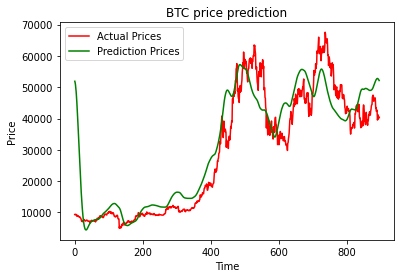

In [84]:
# Testing the Model

test_start = dt.datetime(2020,1,1) + dt.timedelta(days=-prediction_days)
test_end = dt.datetime.now()

test_data = web.DataReader(f'{crypto_currency}-{against_currency}','yahoo',
test_start,test_end)

actual_prices = test_data['Close'].values

total_dataset = pd.concat((data['Close'],test_data['Close']), axis=0)

model_input = total_dataset[len(total_dataset) - len(test_data) - prediction_days:].values
model_input = model_input.reshape(-1,1)
model_input = scaler.fit_transform(model_input)

x_test = []

for x in range(prediction_days,len(model_input)):
    x_test.append(model_input[x-prediction_days:x,0])
    
x_test = np.array(x_test)
x_test = np.reshape(x_test,(x_test.shape[0], x_test.shape[1],1))
print(x_test.shape)
prediction_prices = model.predict(x_test)
prediction_prices = scaler.inverse_transform(prediction_prices)

plt.plot(actual_prices, color = 'red', label = 'Actual Prices')
plt.plot(prediction_prices, color = 'green', label = 'Prediction Prices')
plt.title(f'{crypto_currency} price prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend(loc='upper left')
plt.show()

### Next Day prediction 

[[54007.94]]


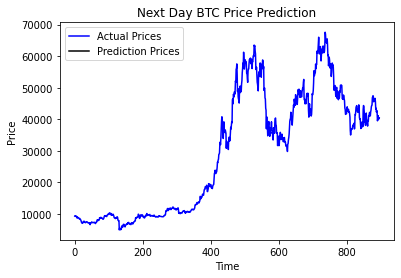

In [81]:
# Predict Next Day

real_data = [model_input[len(model_input) - prediction_days:len(model_input) + 1, 0]]
real_data = np.array(real_data)
real_data = np.reshape(real_data,(real_data.shape[0],real_data.shape[1],1))

prediction = model.predict(real_data)
prediction = scaler.inverse_transform(prediction)
print(prediction)

plt.plot(actual_prices, color = 'blue', label = 'Actual Prices')
plt.plot(prediction, color = 'black', label = 'Prediction Prices')
plt.title(f'Next Day {crypto_currency} Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend(loc='upper left')
plt.show()


### Prepare Data for future Prediction (30 days i.e a month and so on)

In [73]:
# Prepare Data for future Prediction (30 days i.e a month and so on)
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1,1))

prediction_days = 60
future_day = 30

x_train, y_train = [],[]

for x in range(prediction_days, len(scaled_data)-future_day):
    x_train.append(scaled_data[x-prediction_days:x,0])
    y_train.append(scaled_data[x+future_day,0])
    
x_train, y_train = np.array(x_train),np.array(y_train)
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

In [74]:
#Create Neural Network

model = Sequential()

model.add(LSTM(units=50, return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train,y_train,epochs=25,batch_size=32)

Epoch 1/25
24/24 [==============================] - 8s 89ms/step - loss: 0.0708
Epoch 2/25
24/24 [==============================] - 2s 88ms/step - loss: 0.0214
Epoch 3/25
24/24 [==============================] - 2s 91ms/step - loss: 0.0194
Epoch 4/25
24/24 [==============================] - 2s 91ms/step - loss: 0.0191
Epoch 5/25
24/24 [==============================] - 2s 88ms/step - loss: 0.0161
Epoch 6/25
24/24 [==============================] - 2s 90ms/step - loss: 0.0139
Epoch 7/25
24/24 [==============================] - 2s 89ms/step - loss: 0.0117
Epoch 8/25
24/24 [==============================] - 2s 88ms/step - loss: 0.0112
Epoch 9/25
24/24 [==============================] - 2s 89ms/step - loss: 0.0127
Epoch 10/25
24/24 [==============================] - 2s 90ms/step - loss: 0.0104
Epoch 11/25
24/24 [==============================] - 2s 88ms/step - loss: 0.0107
Epoch 12/25
24/24 [==============================] - 2s 90ms/step - loss: 0.0101
Epoch 13/25
24/24 [==================

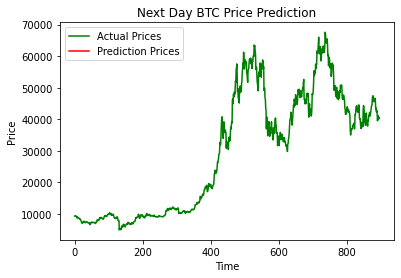

In [75]:
# Predict Next couple of Days

real_data = [model_input[len(model_input) - prediction_days:len(model_input) + 1, 0]]
real_data = np.array(real_data)
real_data = np.reshape(real_data,(real_data.shape[0],real_data.shape[1],1))

prediction = model.predict(real_data)
prediction = scaler.inverse_transform(prediction)

plt.plot(actual_prices, color = 'green', label = 'Actual Prices')
plt.plot(prediction, color = 'red', label = 'Prediction Prices')
plt.title(f'Next Day {crypto_currency} Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend(loc='upper left')
plt.show()
